In [6]:
# Test migration history reconstruction on simulated data

import sys
import os

REPO_DIR = os.path.join(os.getcwd(), "../../")
from metient.metient import *
import metient.lib.vertex_labeling as vert
import metient.util.vertex_labeling_util as vutil

import matplotlib
import torch
MACHINA_DATA_DIR = os.path.join(REPO_DIR, 'metient/data/machina_sims')
OUT_DIR = os.path.join(REPO_DIR, "metient/test/output_plots")

In [7]:
import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        

Ground truth


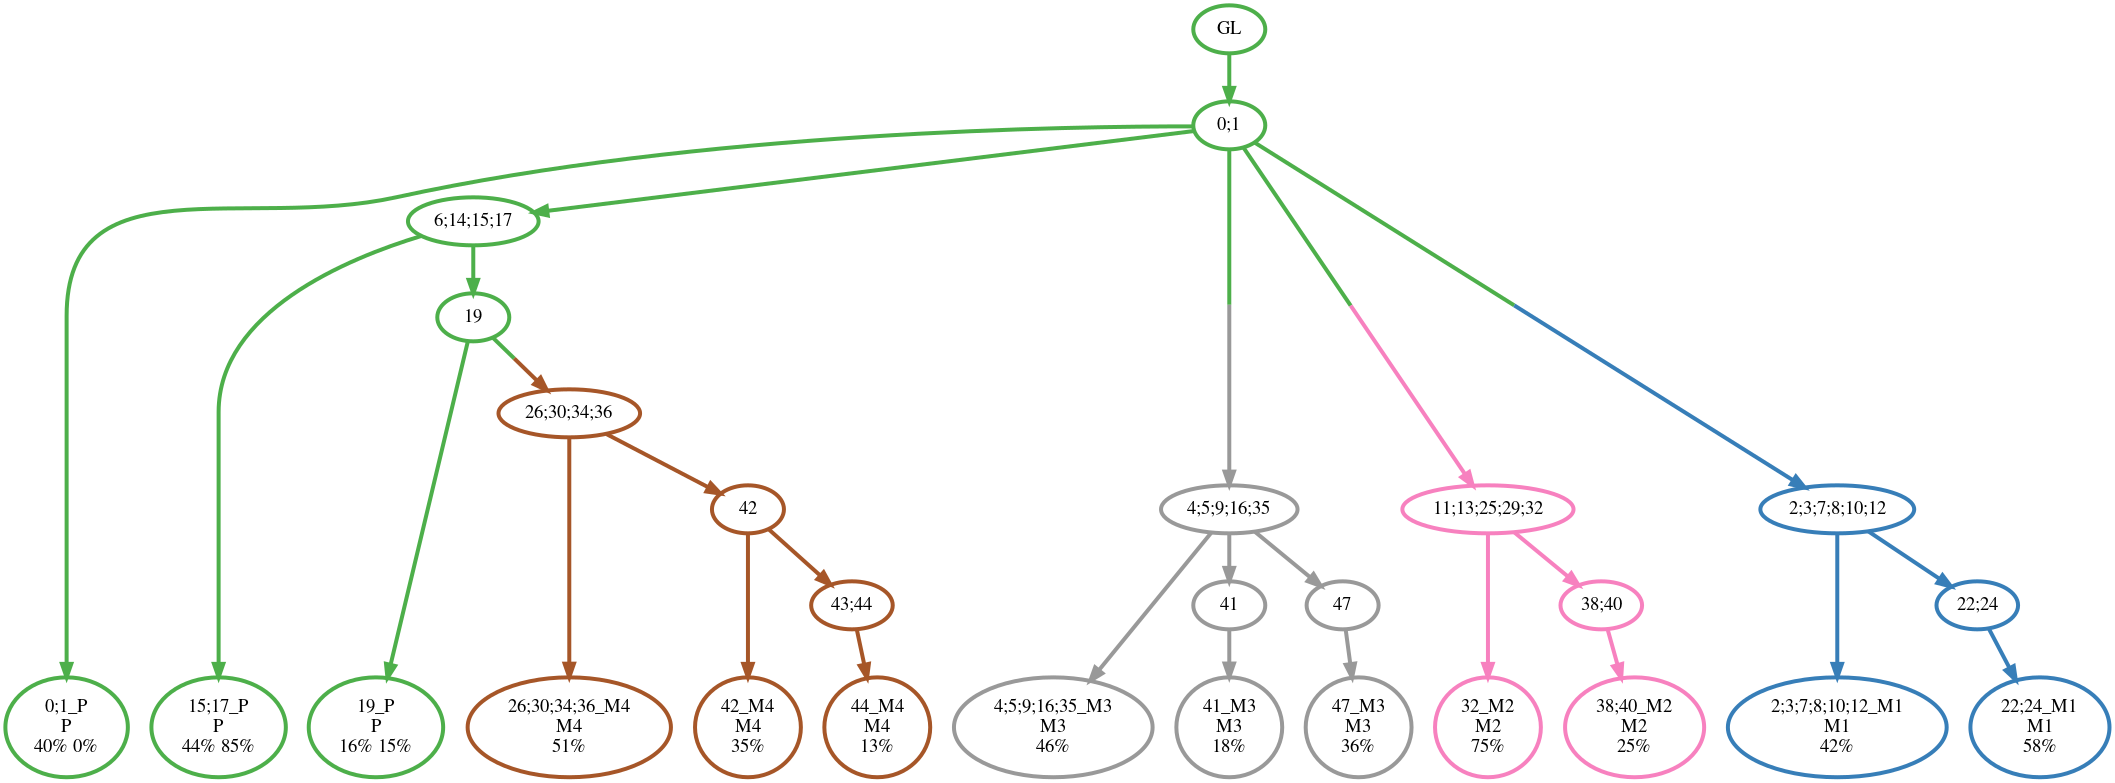

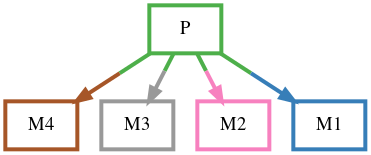

In [11]:
num_sites = "m5"
mig_type = "mS"
seed = 5
# num_sites = "m5"
# mig_type = "M"
# seed = 694
# num_sites = "m5"
# mig_type = "S"
# seed = 31
og_sims_dir = "/data/morrisq/divyak/projects/machina/data/sims"
SIM_DATA_DIR = os.path.join(og_sims_dir, num_sites, mig_type)
print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{seed}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{seed}.dot"))




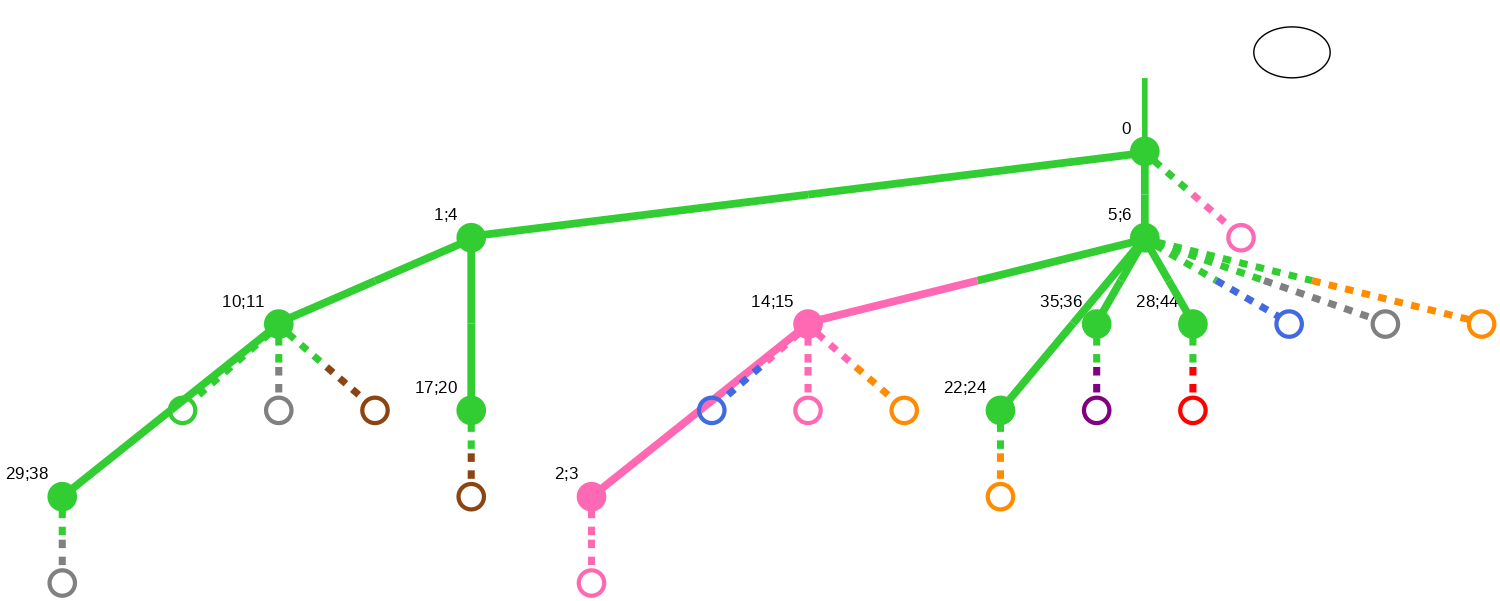

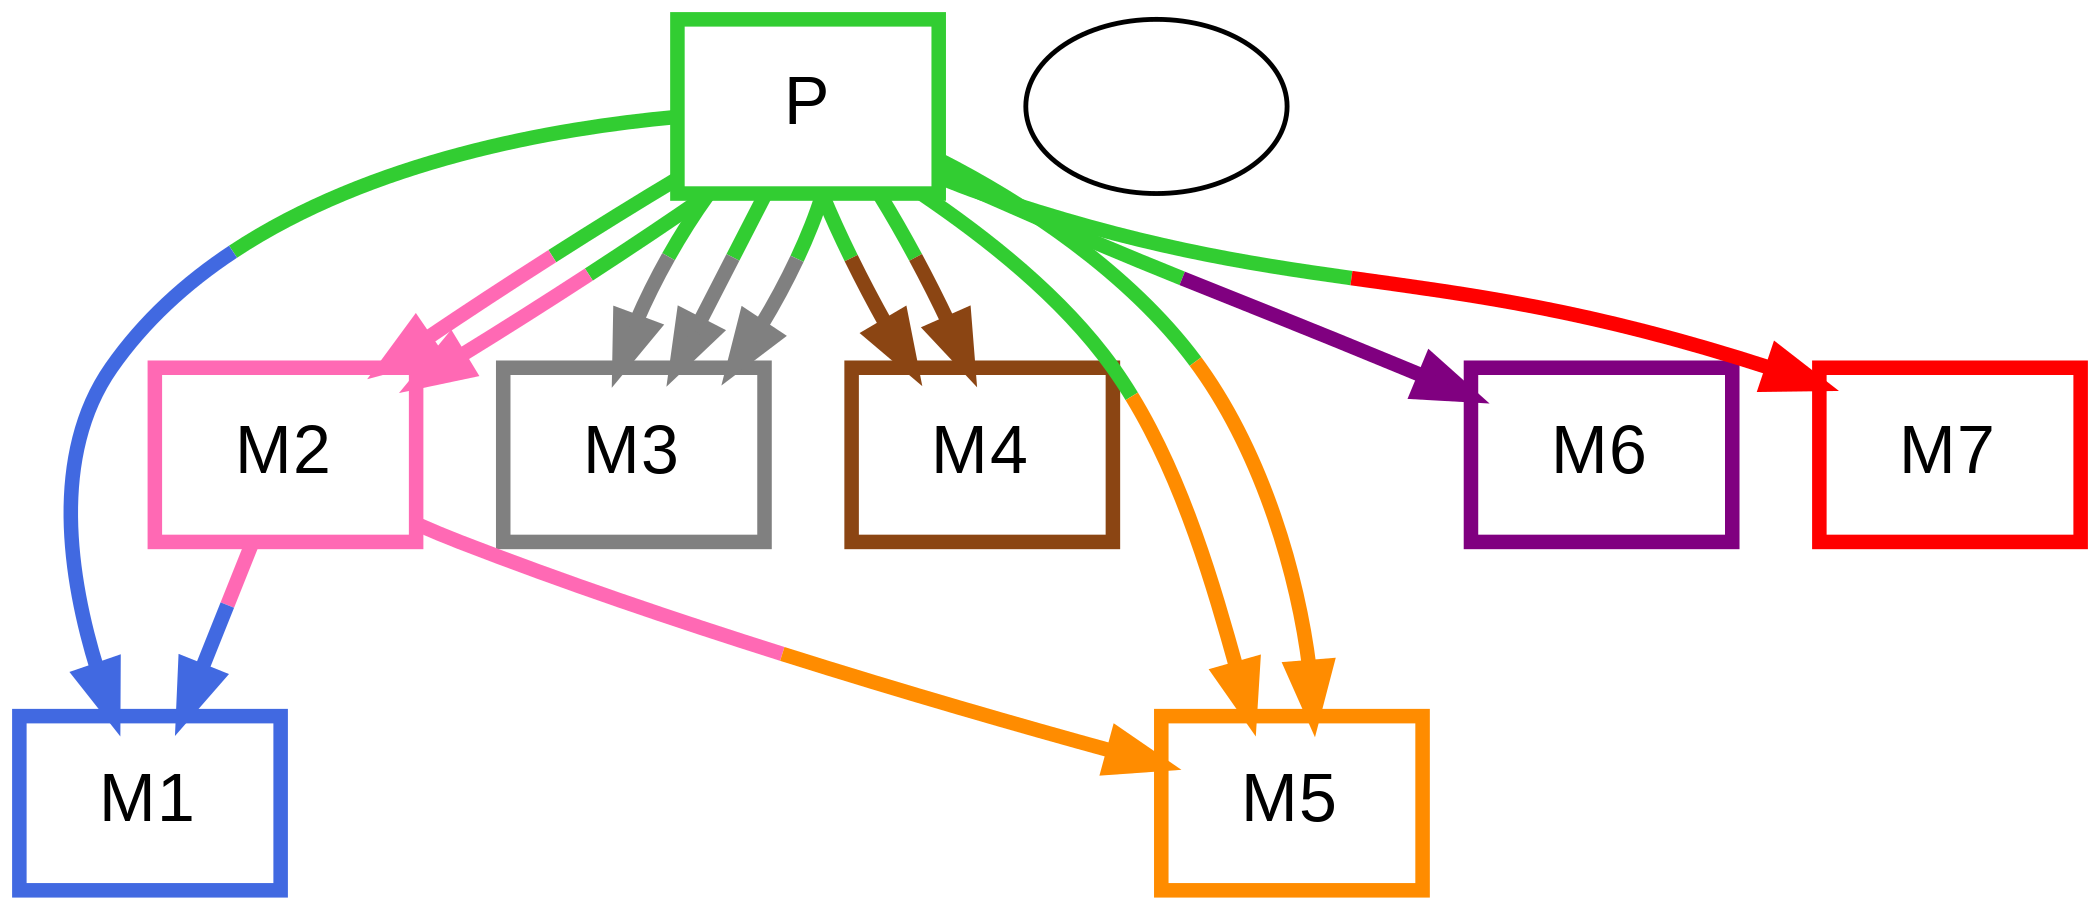

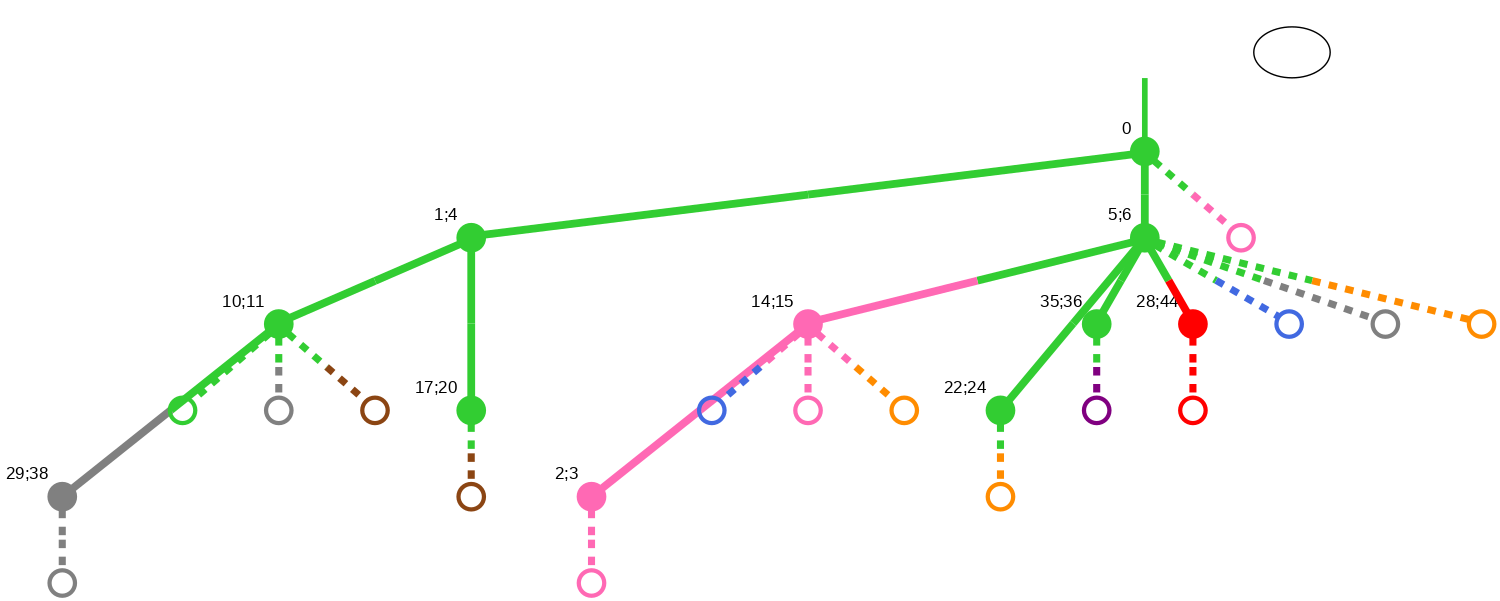

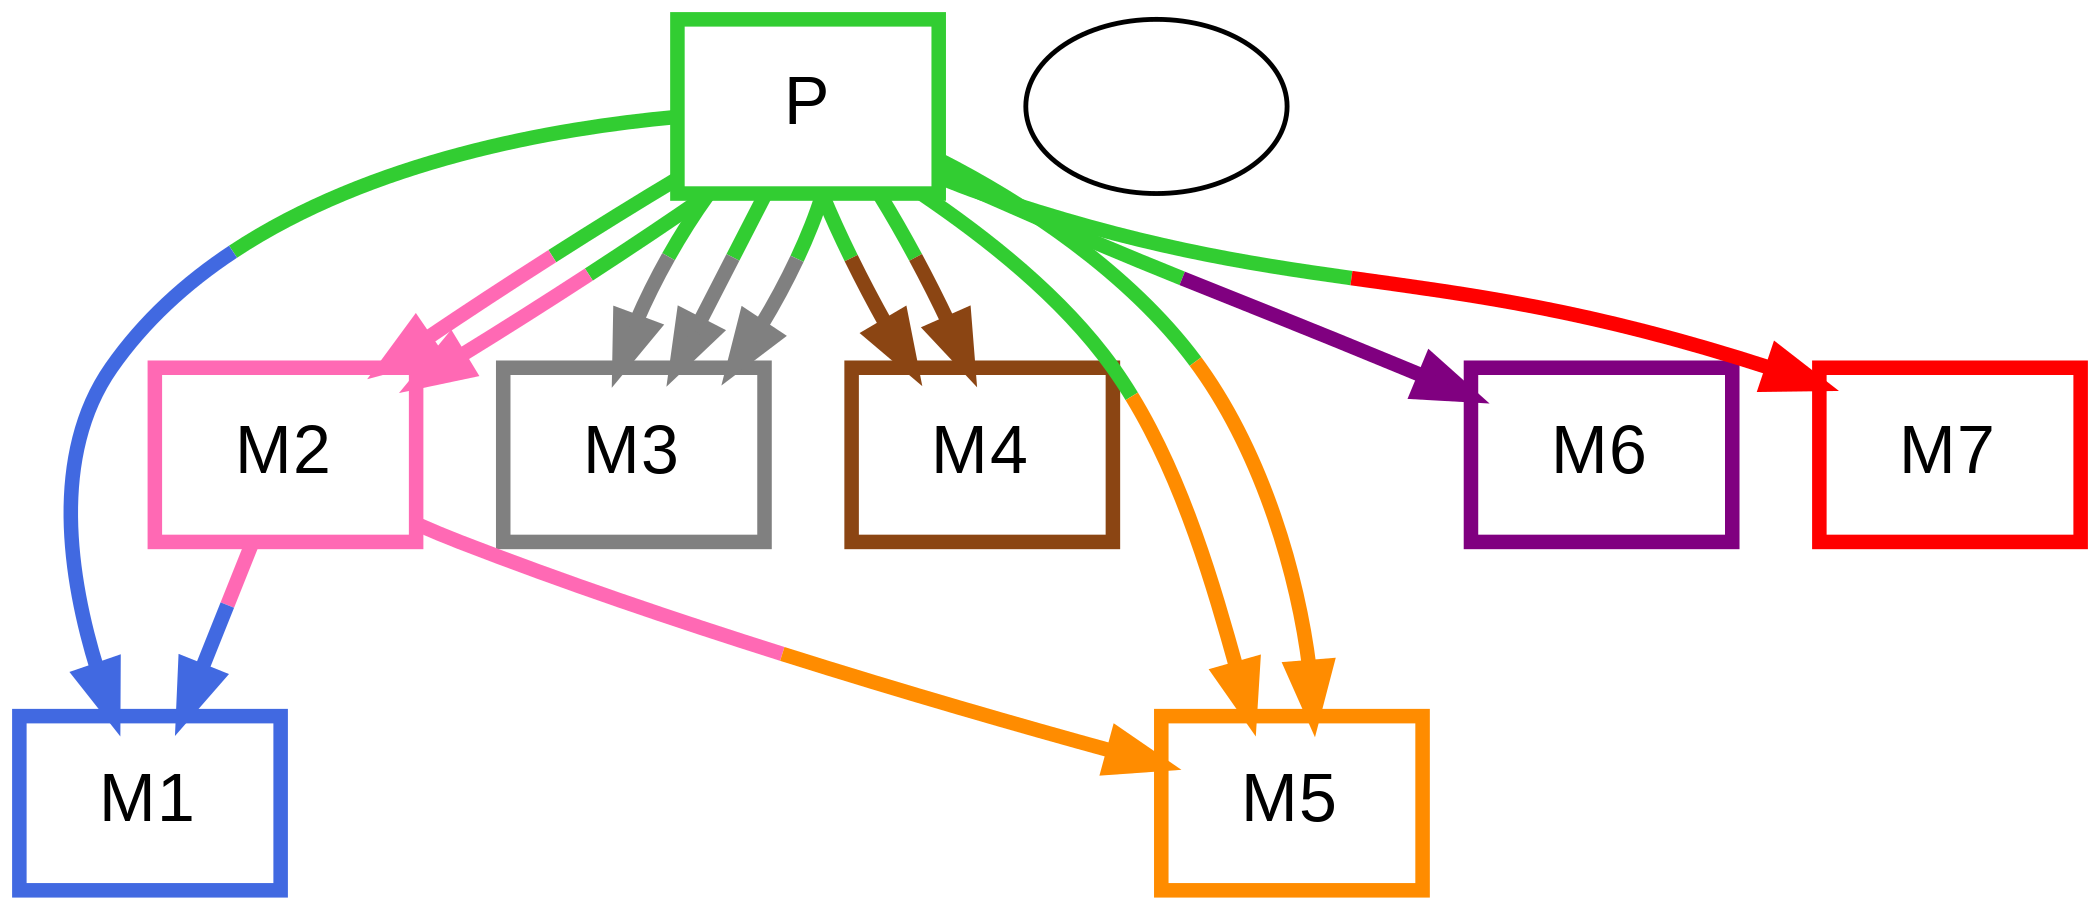

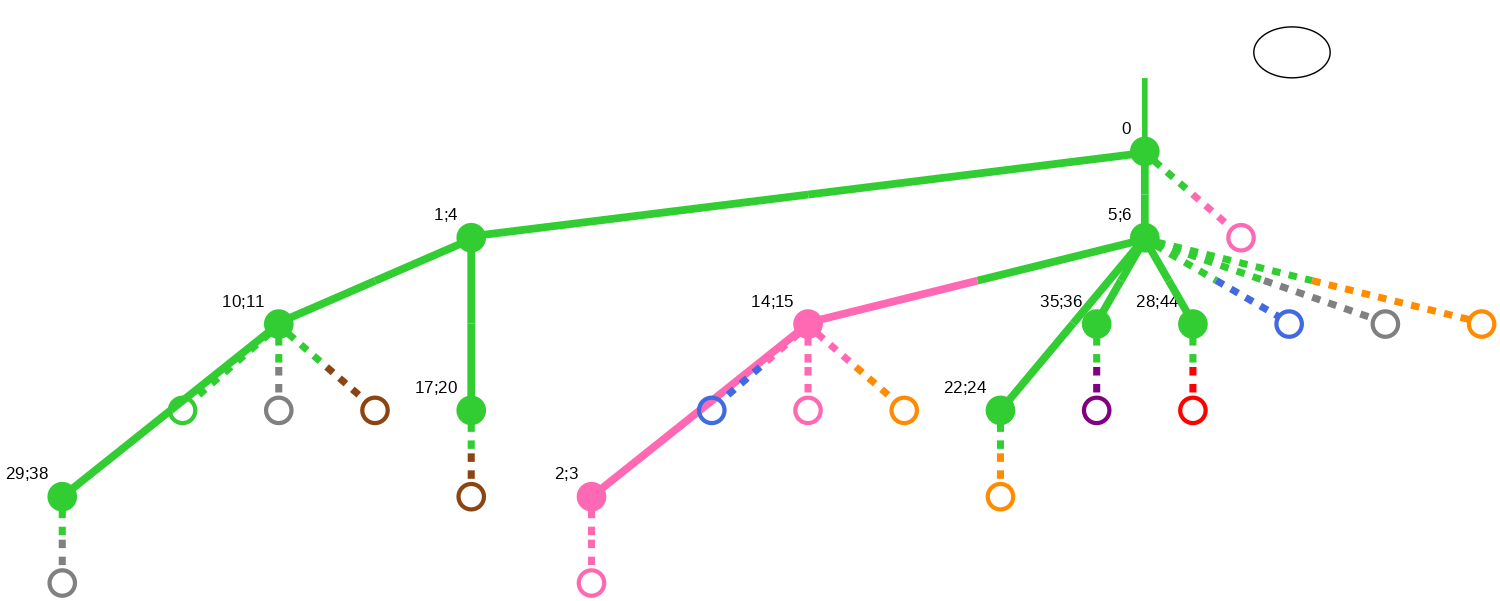

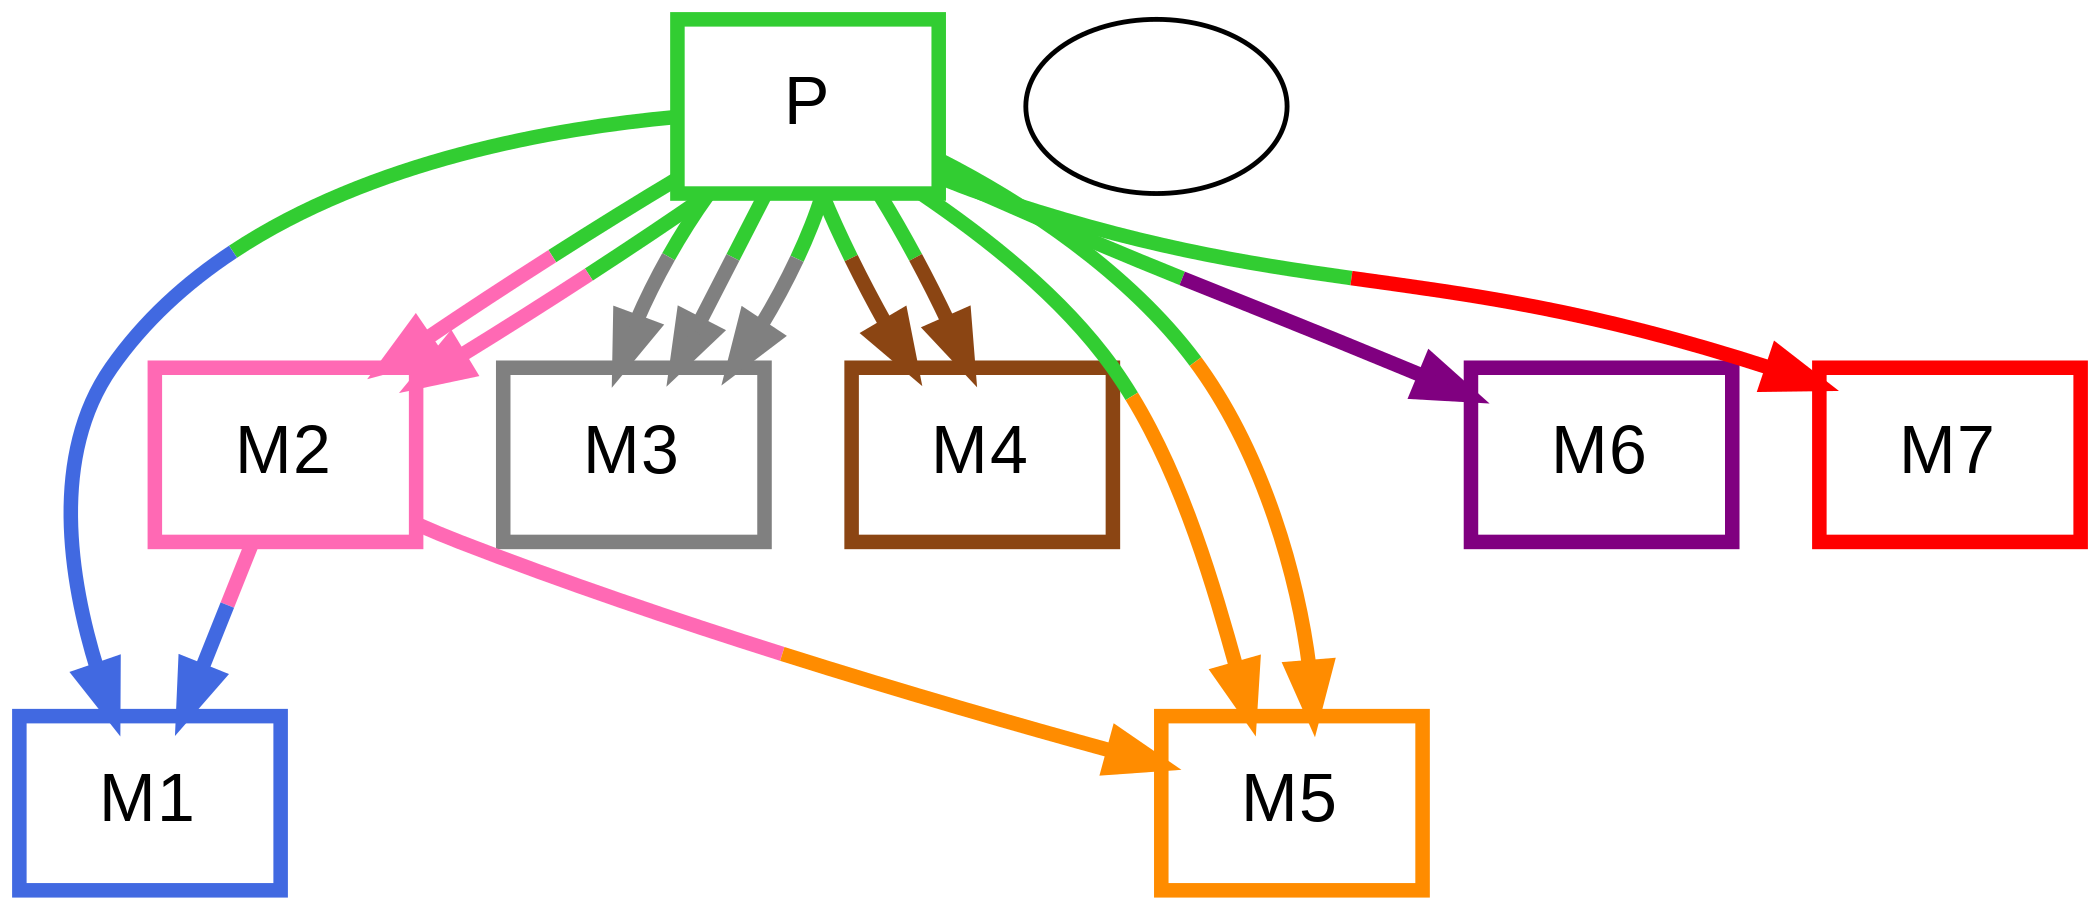

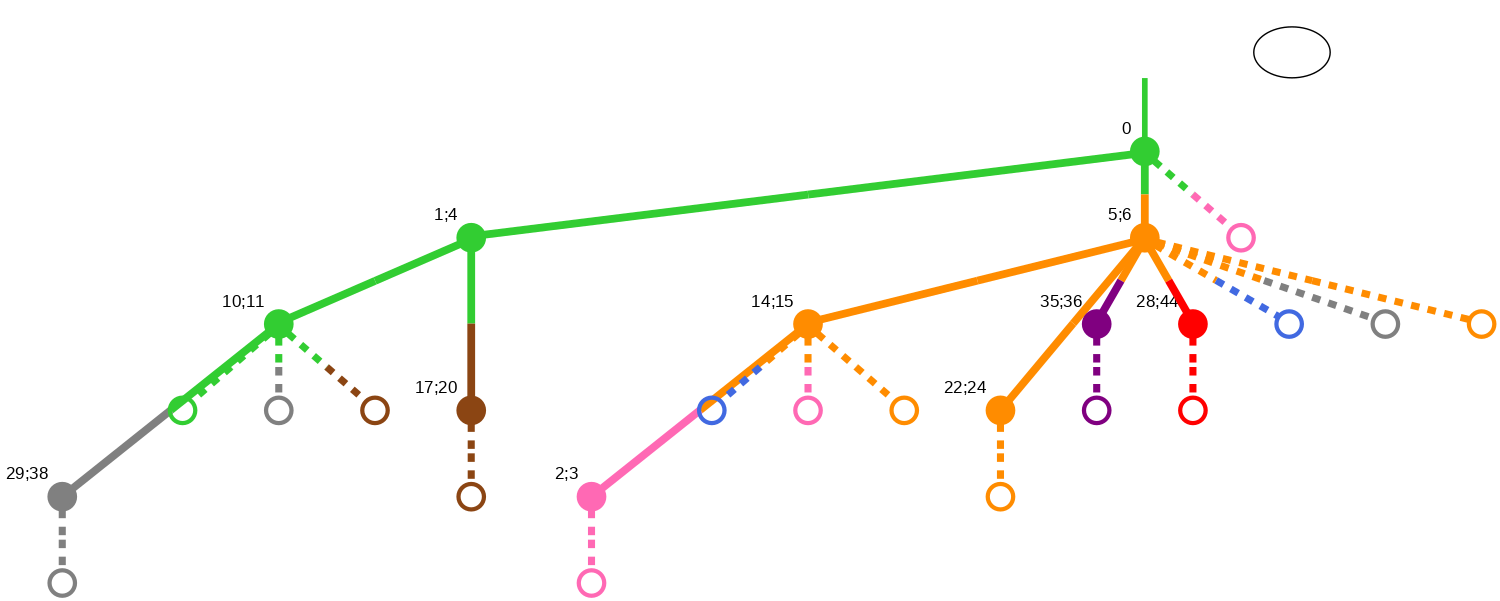

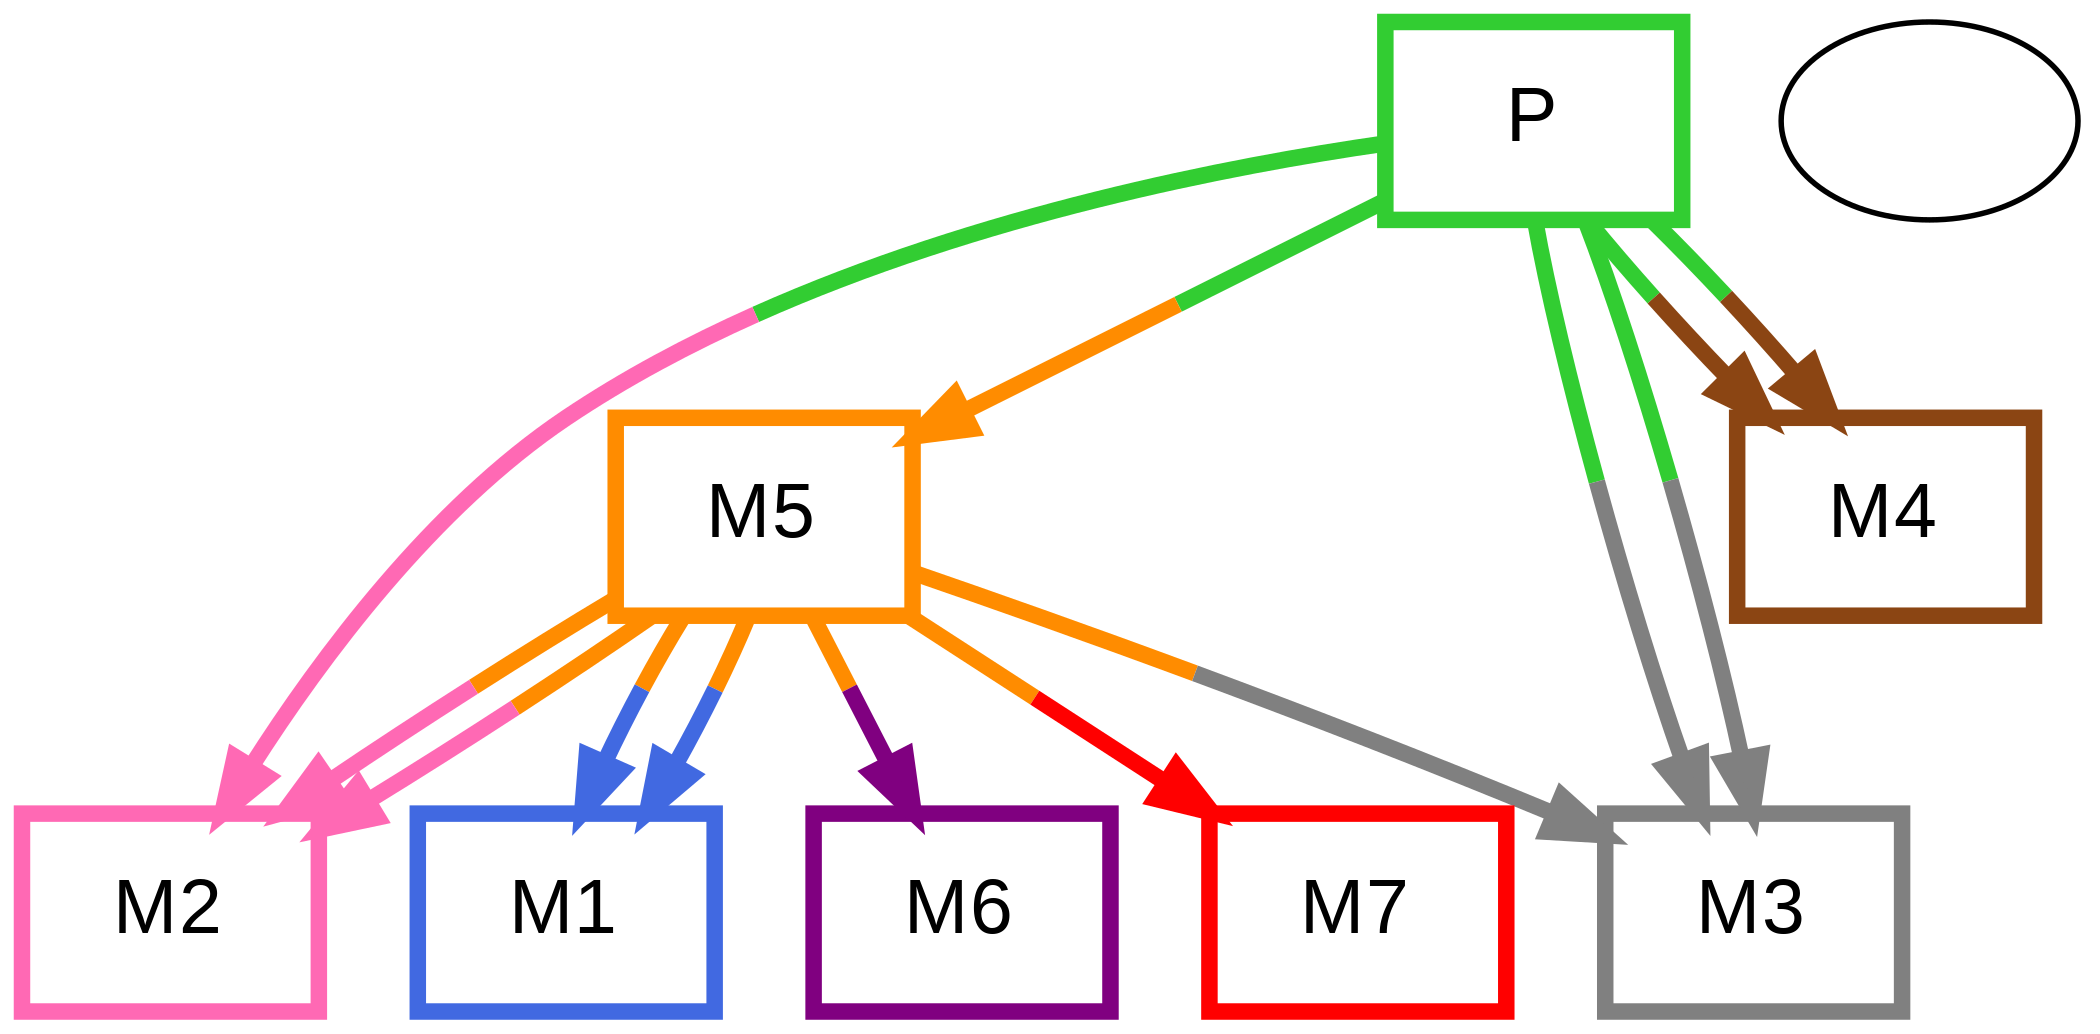

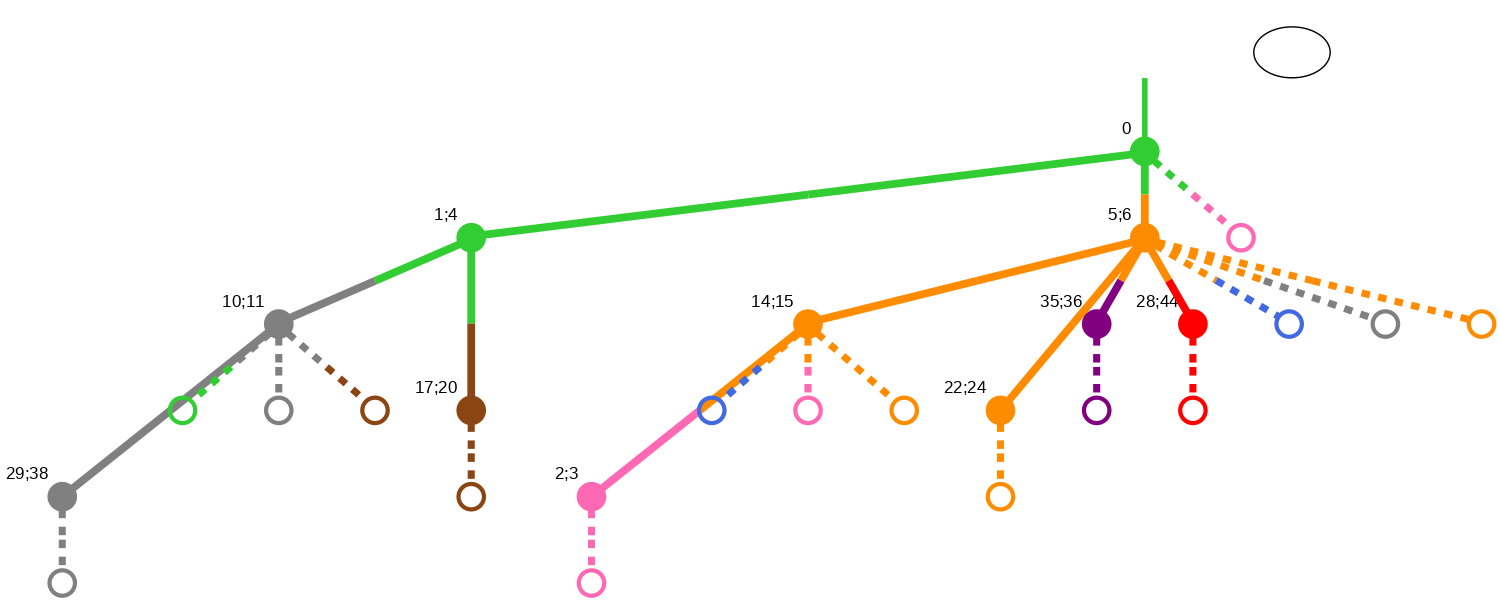

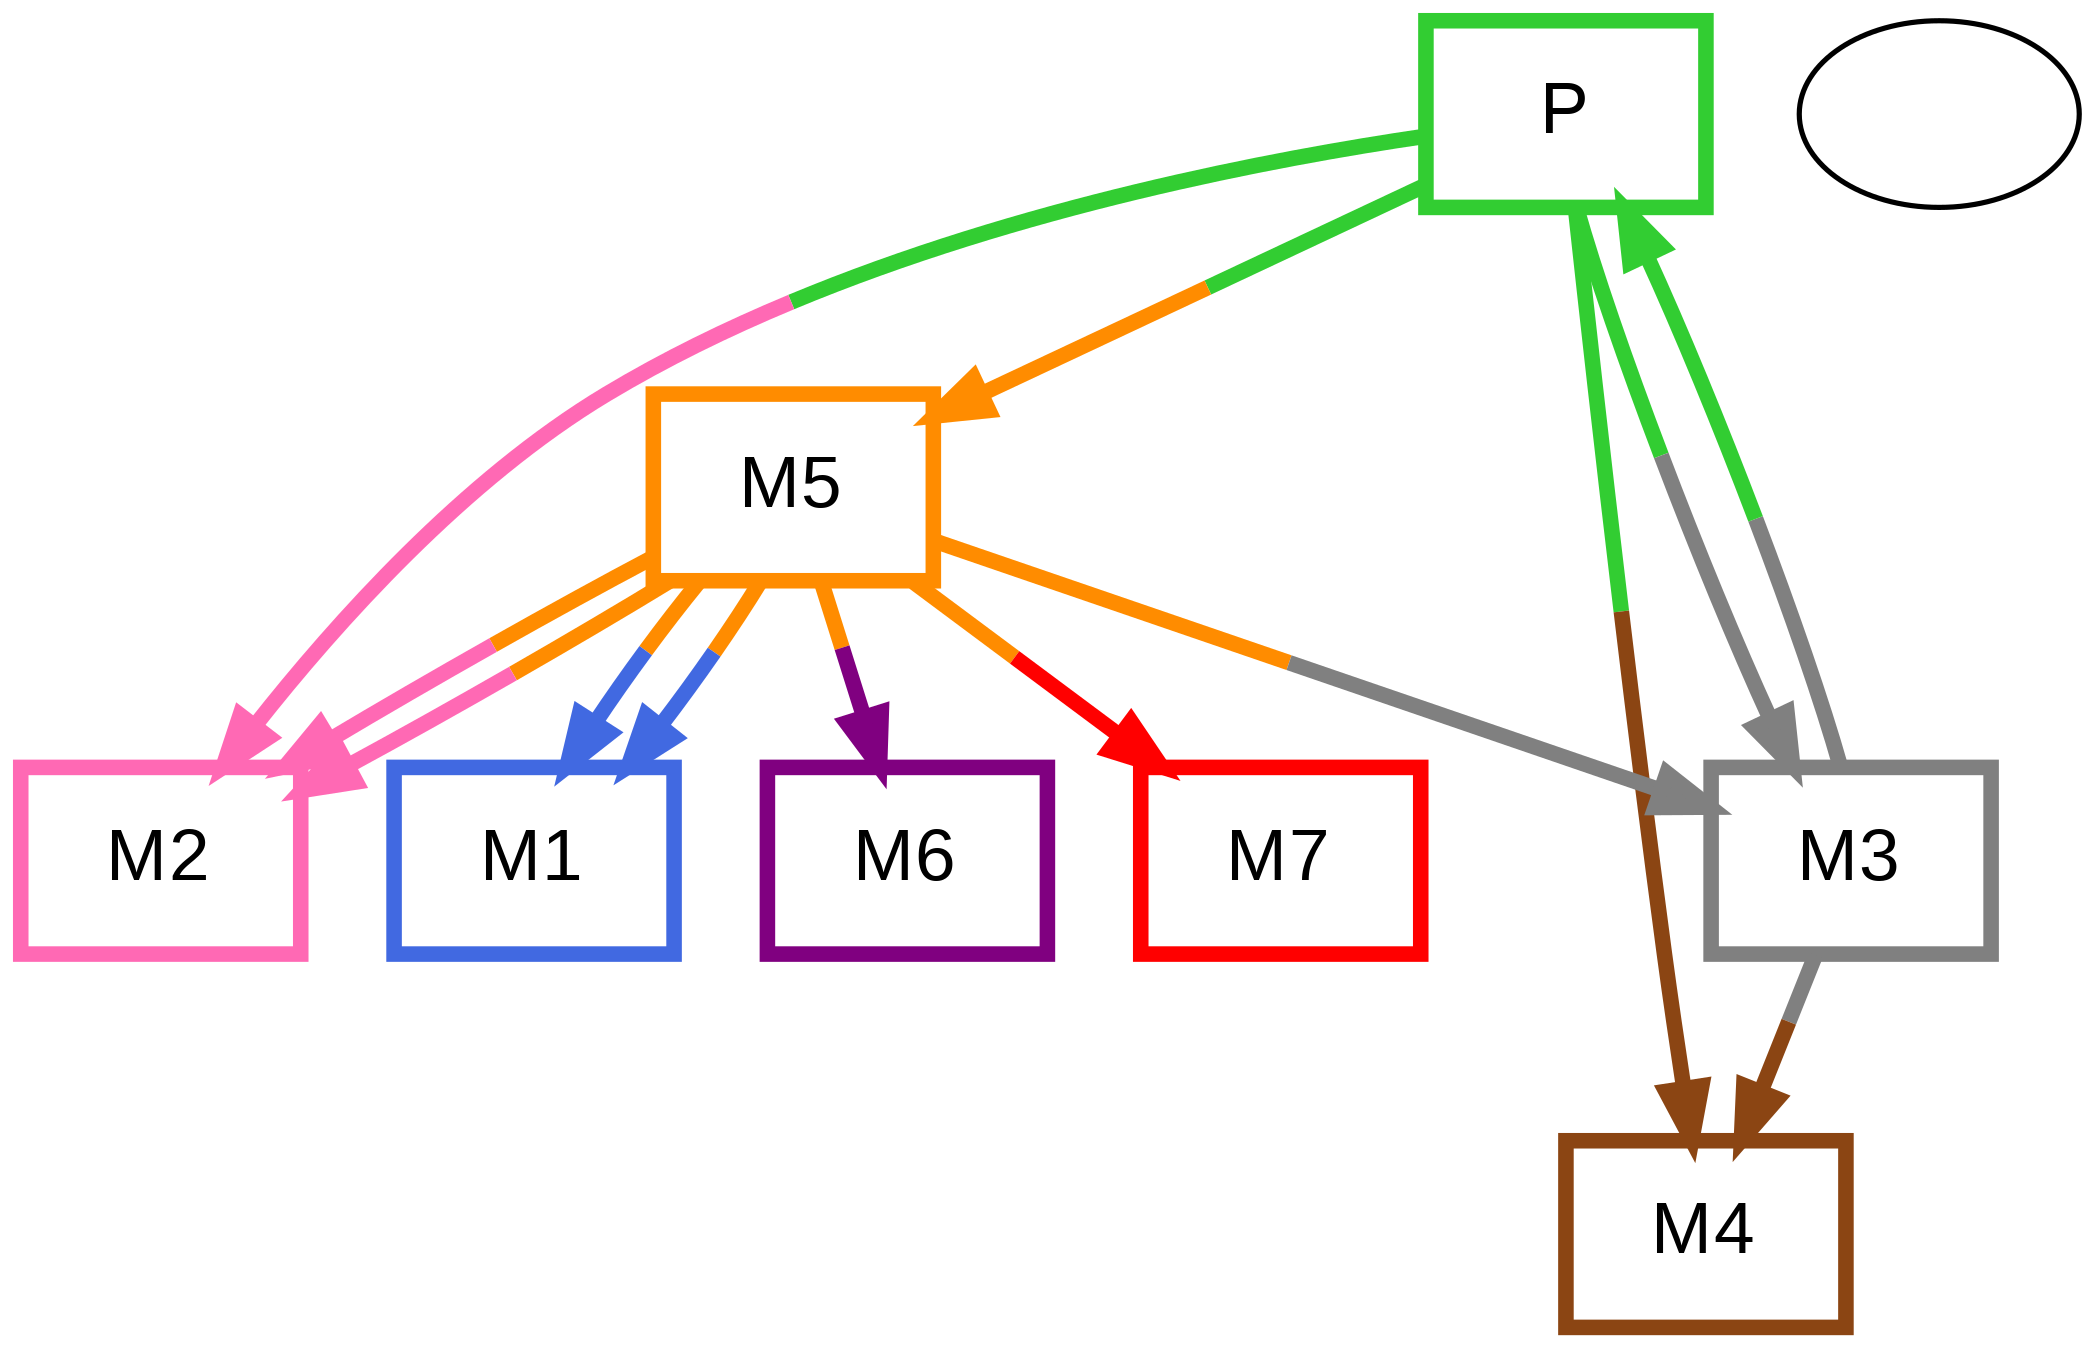

In [16]:
f = '/data/morrisq/divyak/data/metient_prediction_results/'

tree = 1
seed = 45
site = "m8"
mig_type = "M"
for run in range(5):
    base_fn = os.path.join(f, f"predictions_batch_exp_bs64_calibrate_wip_more_calibrate_iters_r{run+1}_03282024", site, mig_type)
    visualize_ground_truth(os.path.join(base_fn, f"tree{tree}_seed{seed}_calibrate.tree.dot"), os.path.join(base_fn, f"tree{tree}_seed{seed}_calibrate.mig_graph.dot"))


In [9]:
import fnmatch
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
def find_labelings_all_mutation_trees(site, cluster_fn, all_mut_trees_fn, ref_var_fn):
    weights = Weights(mig=[10], comig=5, seed_site=1,gen_dist=0.1)
    
    trees = fnmatch.filter(os.listdir(os.path.join(MACHINA_DATA_DIR, f"{site}_clustered_input_corrected")), f"cluster_{mig_type}_seed{seed}_tree*.tsv")

    idx_to_cluster_label = get_idx_to_cluster_label(cluster_fn, ignore_polytomies=True)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label, is_sim_data=True)
    custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
    perf_stats = []
    print("Number of trees:", len(trees))
    for tree_num in range(len(trees)):

        ref_var_fn = os.path.join(MACHINA_DATA_DIR, f"{site}_clustered_input_corrected", f"cluster_{mig_type}_seed{seed}_tree{tree_num}.tsv")
        data = dutil.get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label, is_sim_data=True)
        T = torch.tensor(data[tree_num][0], dtype = torch.float32)
        print_config = PrintConfig(visualize=True, verbose=False, k_best_trees=10, save_outputs=True)
        vert.calibrate([T], [ref_var_fn], print_config, "./output_plots/", [f"tree{tree_num}_seed{seed}"], 
                      None, batch_size=-1, custom_colors=custom_colors, bias_weights=True, solve_polytomies=False)

        

Number of trees: 1
Saving results to ./output_plots/calibrate
Overwriting existing directory at ./output_plots/calibrate
Calibrating for patient: tree0_seed5


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:297: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:288: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 100/100 [00:01<00:00, 91.37it/s]


# final solutions: 2
Calibrating to 1 patients
Early stopping after 31 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)
tree0_seed5_P
10 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

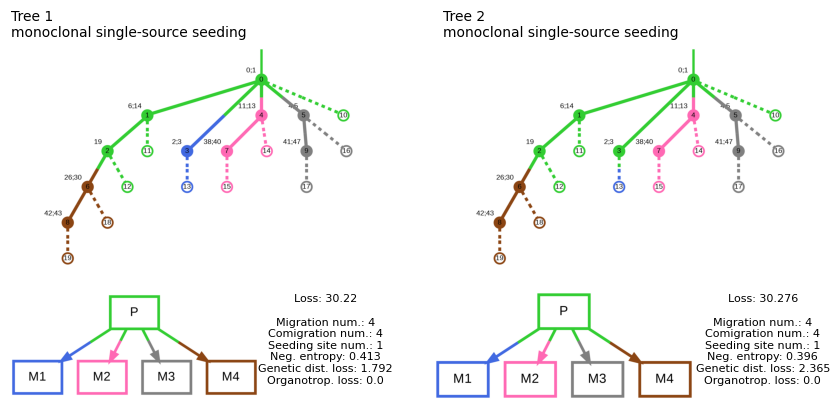

In [10]:
# %%prun
find_labelings_all_mutation_trees(num_sites, os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.tsv"))